<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 지금까지 배운 알고리즘은 훈련세트와 테스트 세트를 나누어 평가를 진행하는데, 결국 테스트 세트로 평가를 하면 테스트 세트에 맞는 모델이 만들어지는 결론이 나온다.

> 테스트 세트의 일반화 성능을 올바르게 예측하려면 가능한 한 테스트세트를 사용하지 말아야 한다.
> -> 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

> 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝을 해보자.

> 교재 p.100~

### 검증세트
* 테스트 세트를 사용하지 않으려면 모델이 과대적합인지 과소적합인지 판단하기 어렵다.
* 테스트 세트를 사용하지 않고 측정하는 간단한 방법은 훈련세트를 또 나누는 것이다.
  * 훈련세트 60%, 검증세트 20%, 테스트세트 20%  : 실무에서 많이 쓰는 기법





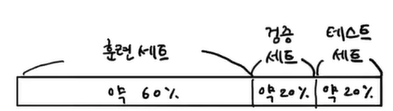

* 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
* 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐 전체 훈련데이터에서 모델을 다시 훈련함
* 마지막 테스트에서 최종 점수를 평가함
* 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함
* 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함

> https://blog.naver.com/jiyu7007/222999258242

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트를 나눔
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42) #20%
# 원본데이터 6497개 20% = train(5197), test(1300)
# 검증세트 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape) # 원래 훈련세트 5,197 개 -> 4,157 / 검증세트  1,040개 생성
print(train_input.shape, test_input.shape)

(4157, 3) (1040, 3)
(5197, 3) (1300, 3)


In [2]:
# sub_input, val_input, sub_target, val_target을 사용해 모델을 만들고 평가함
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)   # 훈련

print(dt.score(sub_input, sub_target))  # 출력 0.997 : 과대적합
print(dt.score(val_input, val_target))  # 검증 0.864
# 매개변수를 바꾸어 더 좋은 모델을 찾아야 함

0.9971133028626413
0.864423076923077


### 교차검증
<3-폴드 교차검증>

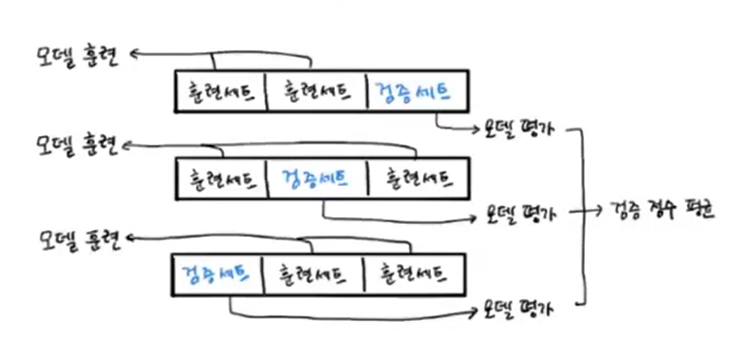

In [3]:
# 검증세트를 만들기 위해 훈련세트가 줄었음(이럴 때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차검증 : 검증세트를 떼어내어 평가하는 과정을 여러번 반복
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5-폴드, 10폴드도 있음
# 사이킷런에는 cross-validation() 이라는 교차검증 함수를 사용

In [4]:
from sklearn.model_selection import cross_validate
# 평가할 모델 객체를 첫번째 매개변수로 전달(직접 검증세트를 떼지 않고 훈련세트 전체를 전달)
scores = cross_validate(dt, train_input, train_target)
# scores = cross_validate(dt, test_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수를 변경 : cv=5(기본값)

print(scores)
# fit_time(훈련시간), score_time(검증시간), test_score(최종점수) 키를 가진 딕셔너리를 반환
# {'fit_time': array([0.03500152, 0.0531528 , 0.04666734, 0.03814721, 0.02323508]),
# 'score_time': array([0.00220728, 0.02044535, 0.00211883, 0.00210214, 0.00575471]),
# 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

{'fit_time': array([0.05186796, 0.02882981, 0.04420662, 0.04547524, 0.0299952 ]), 'score_time': array([0.01536393, 0.01241064, 0.01224232, 0.00926447, 0.00205851]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [5]:
import numpy as np

print(np.mean(scores['test_score']))    # test_score 검증폴드의 점수
# 5개의 검증 점수를 평균을 내어 최종 점수를 얻는다. -> 85.53%

0.855300214703487


### 주의
* cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
* 앞서 우리는 train_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
* 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

* 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정함
* cross_validate()는 기본적으로 회귀모델인 **KFold 분할기**를 사용함
* 분류 모델일 경우 타깃 클래스를 골고루 나누기 위해서 STartfiedKFold를 사용

In [6]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv =StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [7]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-폴드 교차검증 수행
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


* 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야 함
* 테스트 세트를 사용하지 않고 교차검증을 통해서 좋은 모델을 골라야 함

### 하이퍼 파라미터 튜닝
* 모델 파라미터 : 머신러닝 모델이 학습하는 파라미터
* 하이퍼파라미터 : 사용자가 지정해야만 하는 파라미터
* 하이퍼파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련 -> 그 다음 검증세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경
 * 1 ~ 2, 5 ~ 6개의 매개변수를 제공
*  AutoML : 사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술

* max_depth를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다. -> 면 값이 함께 변경됨
* -> 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함 -> 복잡해짐(다중 for문을 사용해야 됨)
* 사이킷런에서 제공하는 그리드서치(Grid Search)가 제공됨 GridSearchCV(CV : 크로스 검증)

In [10]:
from sklearn.model_selection import GridSearchCV    # 그리드서치 크로스 검증용
# min_impurity_decrease 매개변수의 최적값을 찾아보자.
# min_sample_split : 샘플을 최소한 몇 개 이상이어야 split(하위노드로 분리) 할것인지
# -> 클수록 가지치기(과대적합 방지), 작을수록 정확하기(과대적합)
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} # 0.0001~ 증가 5번
# 딕셔너리로 매개변수와 탐색할 값을 리스트로 만듦

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=1)
# 결정트리 클래스의 객체를 생성하자마자 바로 전달
# 일반 모델을 훈련하는 것처럼 fit() 메서드를 호출함
# 이 메서드를 호출하면 서치 객체는 결정트리 모델 min_impurity_decrease 값을 바꿔가면서 총 5번 수행
# GridSearchCV 의 cv 매개변수 기본값은 5 -> 5*5 = 25번 수행(cv 5번 * params 5번)
# n_jobs에서 병렬 실행에 사용될 CPU 코어수 지정(-1로 사용시 모든 코어)

gs.fit(train_input, train_target)   # 훈련시작
# 교차검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련세트로 모델을 다시 만들어야 하지만
# 사이킷런의 그리드 서치는 검즘 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련세트에서 자동으로 다시 모델을 훈련함

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [11]:
# 이렇게 최적화되어 훈련된 모델은 GridSearchCV 클래스로 만들어진 객체의 best_estimator_ 속성에 저장되어 있다.
# 최적의 매개변수는 best_params_ 속성에 저장되어 있다.
print(f"그리드서치를 통해 찾은 최적의 모델 정확도 : {dt.score(train_input, train_target)*100:.2f}%")
print(f"최적의 매개변수 :{gs.best_params_}")

그리드서치를 통해 찾은 최적의 모델 정확도 : 97.06%
최적의 매개변수 :{'min_impurity_decrease': 0.0001}


In [12]:
# 각 매개변수에서 수행한 교차검증의 평균점수는 cv_results_ 속성의 'mean_test_score' 키에 저장되어 있다.
# 5번의 교차검증으로 얻은 점수를 출력해보자.
print(gs.cv_results_['mean_test_score'])
# 'min_impurity_decrease':[0.0001,   0.0002,     0.0003,    0.0004,    0.0005]
#                         [0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [13]:
# 눈으로 보는 것보다 넘파이를 이용해 argmax() 함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.
# 그 다음 이 인덱스를 사용해서 params 키에 저장된 매개변수를 출력해 보자.
# 이 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다.

best_index = np.argmax(gs.cv_results_['mean_test_score'])   # 0.86819297
print(gs.cv_results_['params'][best_index]) # 앞에서 출력한 best_params_ 과 같은지 확인!!

{'min_impurity_decrease': 0.0001}


#### 과정요약
1. 탐색할 매개변수 지정
2. 훈련세트에서 그리드서치를 수행하여 최상의 평균검증 점수가 나오는 매개변수 조합을 찾음 -> 그리드서치에 저장
3. 그리드서치는 최상의 매개변수에서 전체 훈련세트를 사용해 최종 모델을 훈련 -> 그리드서치에 저장

In [16]:
# 조금 더 복잡한 매개변수 조합을 해보자.
# 노드를 분할하기 위한 불순도 감소 최소량 지정 : max_depth(트리의 깊이)
# min_sample_split 노드를 나누기 위한 최소 샘플수
# 넘파이 arange() 하수는 첫번째 매개변수 값에서 시작해서 두번째 매개변수에 도달할 때까지 세번째 매개변수를 계속 더한 배열을 만듦
# 0.0001~0.001 까지 0.0001을 더한 배열(두번째 매개변수는 포함되지 않음) = 9번
# 파이썬 range() 함수는 정수만 사용가능 5~20까지 1씩 증가 = 15개
# 교차검증회수 9* 15* 10 = 1350개 * 5-폴드교차 = 6750개

params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),   #9번
          'max_depth': range(5, 20, 1),                                 # 5~20까지 1씩 증가 = 15개
          'min_samples_split': range(2, 100, 10)                         # 2~100까지 10번
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)   # 훈련시작

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

* criterion : 분할품질을 측정하는 기능(default : gini)
* splitter : 각 노드에서 분할을 선택하는데 사용되는 전략(default : best)
* max_depth : 트리의 최대깊이(값이 클수록 모델의 복잡도가 올라간다.)
* min_samples_split : 자식노드를 분할하는데 필요한 최소 샘플수(default : 2)
* min_samples_leaf : 리프 노드에 있어야할 최소 샘플수(default : 1)
* min_weight_fraction_leaf : min_samples_leaf와 같지만 가중치가 부여된 샘플수에서의 비율
* max_features : 각 노드에서 분할에 사용할 특징의 최대수
* random_state : 난수 seed 설정
* max_leaf_nodes : 리프 노드의 최대수
* min_impurity_decrease : 최소 불순도
* min_impurity_split : 나무 성장을 멈추기 위한 임계치
* class_weight : 클래스 가중치
* presort : 데이터 정렬 필요여부

In [17]:
print(gs.best_params_)  # 최상의 매개변수 조합 확인
# {'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [18]:
print(np.max(gs.cv_results_['mean_test_score']))    # 최상의 교차점수 확인
# 개선점 : 탐색할 매개변수 간격을 0.0001 혹은 1로 설정했는데 근거 부족(좁히거나 넓힐 필요성?)

0.8683865773302731


* 매개변수 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있음
* 너무 많은 매개변수 조건이 있어 그리드 서치 수행시간이 오래 걸림
* 해결 : 랜덤 서치를 사용해 보자.

* 랜덤서치 : 매개변수의 값을 목록에 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포도 객체를 전달
* 싸이파이 : 파이썬의 핵심과학 라이브러리로 적분, 보간, 선형대수, 확률 등 포함한 수치계산용 전용 라이브러리(코랩에 내장)

In [19]:
from scipy.stats import uniform, randint
# uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다.(균등분포에서 샘플링)
# randint()에서는 정수값을 추출, uniform()은 실수값을 뽑음

In [20]:
rgen = randint(0, 10)   # 10개 숫자를 샘플링(랜덤)
rgen.rvs(10)    # array([4, 0, 0, 6, 6, 2, 4, 7, 8, 5])

array([4, 0, 0, 6, 6, 2, 4, 7, 8, 5])

In [30]:
np.unique(rgen.rvs(1000), return_counts=True)   # 1000개를 샘플링해서 각 숫자의 개수를 세어봄

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 93,  94, 118,  96,  98, 107, 101, 105,  86, 102]))

In [31]:
ugen = uniform(0, 1)    # 실수 테스트
ugen.rvs(10)    # 난수발생기(랜덤과 유사)

array([0.78460828, 0.10776919, 0.42504439, 0.36157532, 0.48233483,
       0.53486782, 0.66490699, 0.32658082, 0.8536641 , 0.65868114])

In [32]:
# 탐색할 매개변수의 딕셔너리 만들기
# min_samples_leaf를 탐색대상에 추가
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),   #0.0001~0.001 의 실수값
          'max_depth': randint(20, 50),                                 # 20~50 사이의 정수
          'min_samples_split': randint(2, 25),                    # 2~25 사이의 정수
          'min_samples_leaf' : randint(1, 25)                       # 리프노드가 되기 위한 최소 샘플개수
}

In [33]:
# 샘플링 회수는 사이킷런의 랜덤서치 클래스인 RandomizedSearchCV의 n_iter 매개변수에 지정
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
# n_iter=100 총 100번을 샘플링하여 교차 검증을 수행(최적의 매개변수 조합을 찾음)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d28201799c0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d2820178670>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d2820178c40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d282017a290>},
                   random_state=42)

In [34]:
print(gs.best_params_)  # 결과 최적의 매개변수 조합 찾기
# {'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [35]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최고의 교차 검증 점수 확인

0.8695428296438884


In [36]:
# 최종 모델로 결정하고 테스트세트 성능 확인
dt = gs.best_estimator_
print(dt.score(test_input, test_target))    # 검증점수 86.95%, 테스트점수 86%

0.86
